<a href="https://colab.research.google.com/github/Dhanasree-Rajamani/Machine_learning_Assignments/blob/main/Assignment2_GMM/GMM_ML_Food_Sustainability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Impact of Food Production on Environment 

The following cells consists of:

Exploratory Data Analysis

Data cleaning

Data processing 

Data Imputation

One hot encoding and Scaling

GMM, Agglomerative and K-Means clustering 

Import statements

In [60]:
!pip install IPython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown
from IPython.display import clear_output

In [62]:
food_prod = pd.read_csv('https://raw.githubusercontent.com/Dhanasree-Rajamani/Machine_learning_Assignments/main/dataset/Food_Production.csv')

In [63]:
fao = pd.read_csv('https://raw.githubusercontent.com/Dhanasree-Rajamani/Machine_learning_Assignments/main/dataset/FAO.csv',  encoding = 'ISO-8859-1')

Food product and various emissions caused

The food production dataset consists of various food products and various emissions caused by them - such as land usage, water usage, packaging and transport emission, eutrophication etc. These variables can be used to determine how the production of these products affects the environment inorder to determine which production can be increased or decreased - for sustainable food and thereby, a better Earth  

In [64]:
food_prod.head(5)

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,371.076923,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480


This dataset consists of countries producing various Food/Feed products from 1961 to 2013, which can be used to determine which countries produce the most and least of which kind of food product. This can be used to promote and produce more food products which cause less emission - through various measures. 

In [65]:
fao.head(5)

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


In [66]:
fao.drop(columns=["Area Abbreviation","Area Code","Item Code","Element Code","latitude","longitude"], inplace=True)

Here, taking the food items dataset(We've split the datasets between us in the team)

In [67]:
food_prod.dtypes

Food product                                                                object
Land use change                                                            float64
Animal Feed                                                                float64
Farm                                                                       float64
Processing                                                                 float64
Transport                                                                  float64
Packging                                                                   float64
Retail                                                                     float64
Total_emissions                                                            float64
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)                   float64
Eutrophying emissions per kilogram (gPO₄eq per kilogram)                   float64
Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)      float64
Fres

In [68]:
cat_cols = food_prod.select_dtypes(["object"]).columns
print("Count of categorical variables is",cat_cols.value_counts().sum())
num_cols = food_prod.select_dtypes(["float64","int64"]).columns
print("Count of numerical variables is",num_cols.value_counts().sum())

Count of categorical variables is 1
Count of numerical variables is 22


For understanding the dataset, taking the columns that contribute to total_emission feature 

In [69]:
fp_subset = food_prod[['Food product',	'Land use change',	'Animal Feed',	'Farm', 'Processing',	'Transport',	'Packging',	'Retail']]

In [70]:
df_grouped = fp_subset.groupby('Food product').sum()[['Land use change',	'Animal Feed',	'Farm', 'Processing',	'Transport',	'Packging',	'Retail']]
df_grouped

,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail
Food product,,,,,,,
Apples,0.0,0.0,0.2,0.0,0.1,0.0,0.0
Bananas,0.0,0.0,0.3,0.1,0.3,0.1,0.0
Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3
Beef (beef herd),16.3,1.9,39.4,1.3,0.3,0.2,0.2
Beef (dairy herd),0.9,2.5,15.7,1.1,0.4,0.3,0.2
Beet Sugar,0.0,0.0,0.5,0.2,0.6,0.1,0.0
Berries & Grapes,0.0,0.0,0.7,0.0,0.2,0.2,0.0
Brassicas,0.0,0.0,0.3,0.0,0.1,0.0,0.0
Cane Sugar,1.2,0.0,0.5,0.0,0.8,0.1,0.0


Visualization of various emissions caused by all food products

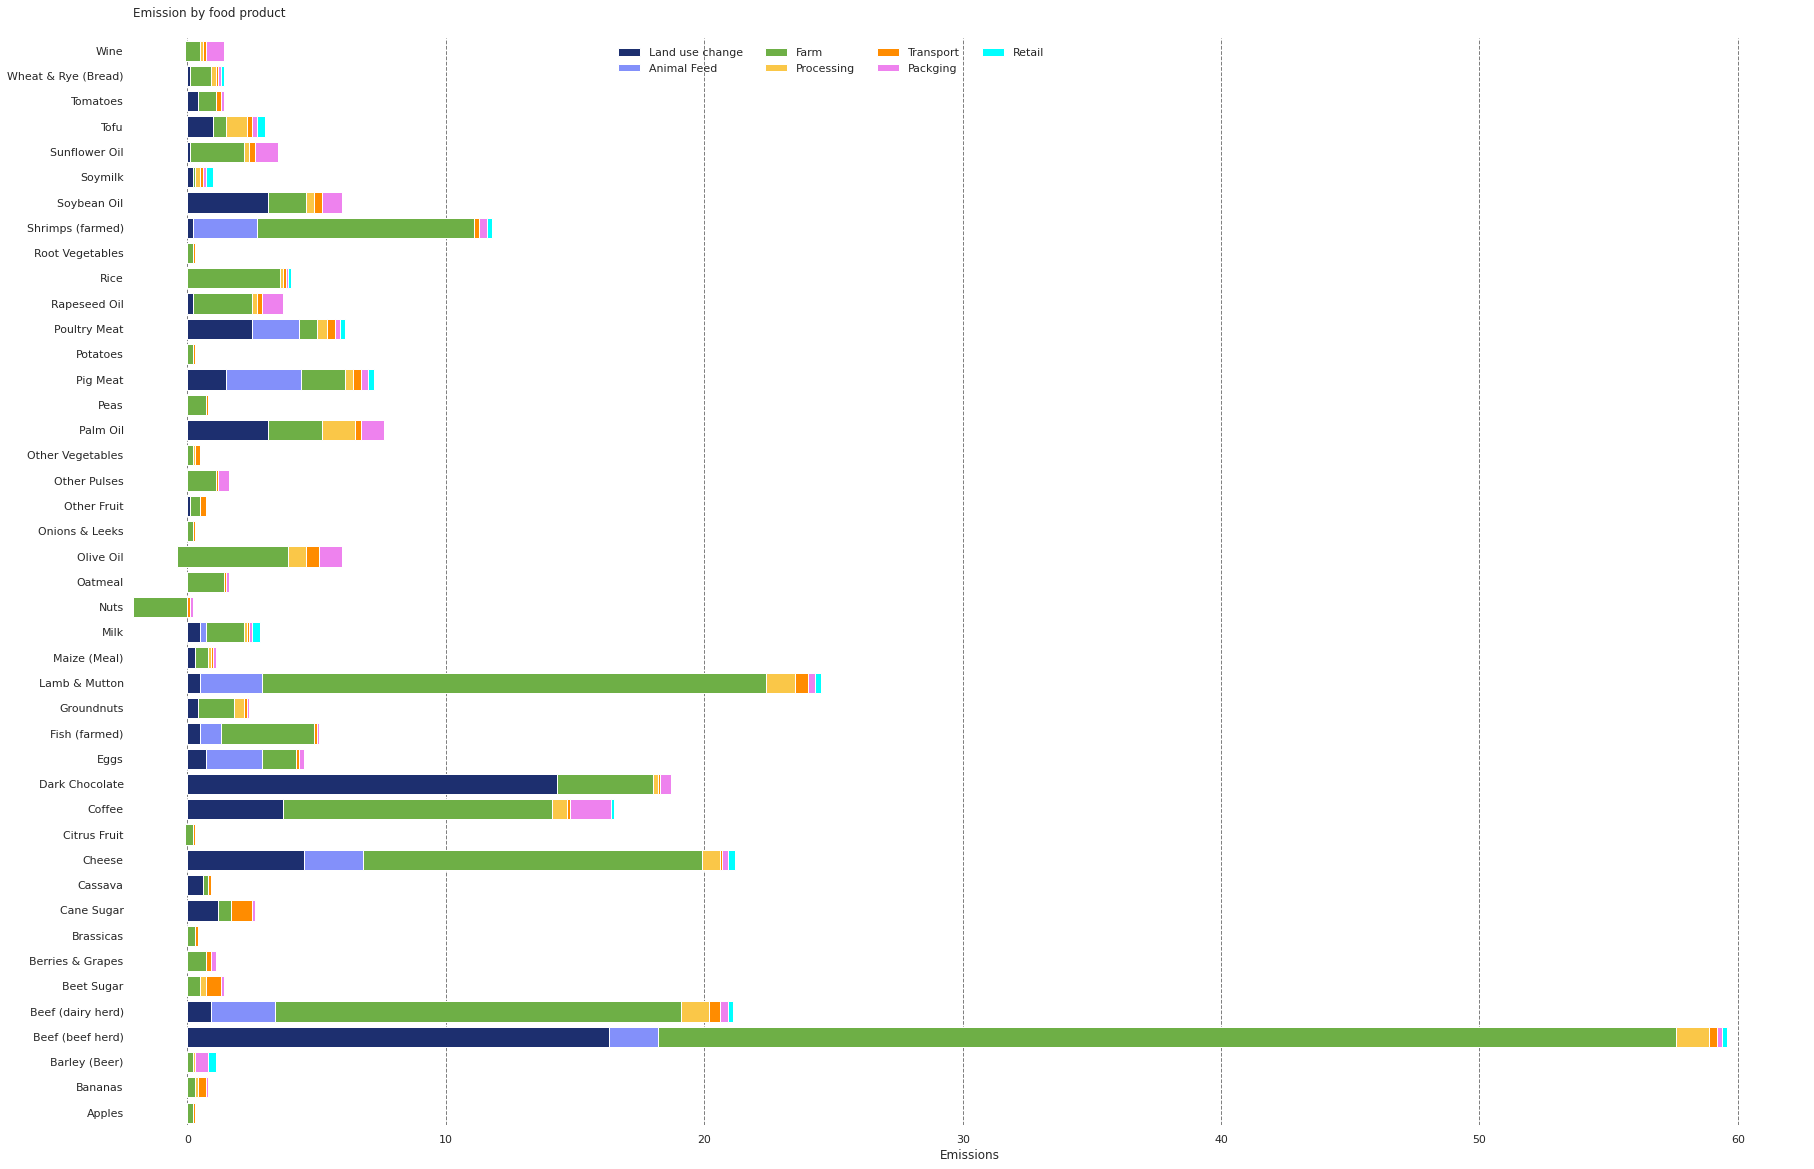

In [71]:
fields = ['Land use change',	'Animal Feed',	'Farm', 'Processing',	'Transport',	'Packging',	'Retail']
colors = ['#1D2F6F', '#8390FA', '#6EAF46', '#FAC748', "#FF8C00", "#EE82EE", "#00FFFF", "#FF4500"]
labels = ['Land use change',	'Animal Feed',	'Farm', 'Processing',	'Transport',	'Packging',	'Retail']
# figure and axis
fig, ax = plt.subplots(1, figsize=(30, 20))
# plot bars
left = len(df_grouped) * [0]
for idx, name in enumerate(fields):
    plt.barh(df_grouped.index, df_grouped[name], left = left, color=colors[idx])
    left = left + df_grouped[name]
# title, legend, labels
plt.title('Emission by food product\n', loc='left')
plt.legend(labels, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False)
plt.xlabel('Emissions')
# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
# adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()

This dataframe contains total_emissions which is a sum of the first 7 columns, and the other emission columns in units of emissions per 1000kcal

In [72]:
df_food = food_prod[['Total_emissions','Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)','Freshwater withdrawals per 1000kcal (liters per 1000kcal)','Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)','Land use per 1000kcal (m² per 1000kcal)','Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)']]

In [73]:
#df_food = df_food.replace(np.nan, 0)
df_food=df_food.dropna(axis=0)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



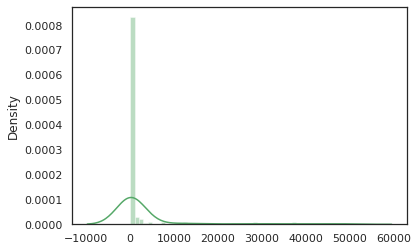

In [74]:
import numpy as np
import seaborn as sns

sns.set( style = "white" )
      
sns.distplot(df_food, kde = True, color = "g")

Scaling the data

In [75]:
#scaler=StandardScaler()
#scaler.fit(df_food)
df_food = np.log(df_food)

In [76]:
#df_food_=scaler.transform(df_food)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



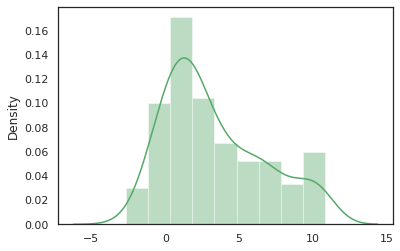

In [77]:
import numpy as np
import seaborn as sns


sns.set( style = "white" )
      
sns.distplot(df_food, kde = True, color = "g")

In [78]:
#'Total_emissions',	'Land use change',	'Animal Feed',	'Farm', 'Processing',	'Transport',	'Packging',	'Retail', 'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)',
#'Freshwater withdrawals per 1000kcal (liters per 1000kcal)',                  
#'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)',               
#'Land use per 1000kcal (m² per 1000kcal)',                                    
#'Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)'

In [79]:
df_temp = pd.DataFrame(df_food, columns = ['Total_emissions',	'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)', 'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)', 'Land use per 1000kcal (m² per 1000kcal)', 'Freshwater withdrawals per 1000kcal (liters per 1000kcal)','Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)' ])

In [80]:
df_temp = df_temp.join(food_prod['Food product'])

In [81]:
df_food = df_temp

Interactive visual where we can choose the type of food product in the drop down and the graph comes up displaying the various kinds and levels of emission caused by the chosen food product  

In [82]:
# Define the function to create the bar chart
def plot_food_features(food):
    # Filter the dataframe to get only the rows with the selected food value
    food_data = df_food[df_food['Food product'] == food]
    # Create a bar chart of the filtered data
    # Set plot title and axis labels
    #plt.clf()
    food_data.plot(kind='bar', figsize=(30, 15))
    # Set plot title and axis labels
    plt.title('Food Products')
    plt.xlabel(['Total_emissions', 'Land use change',	'Animal Feed',	'Farm', 'Processing',	'Transport',	'Packging',	'Retail', 'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)',
'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)',               
'Land use per 1000kcal (m² per 1000kcal)'])
    plt.ylabel("Emission")
    # Show the plot
    plt.show()

# Create a dropdown menu with the list of food values from the dataframe
food_dropdown = Dropdown(options=df_food['Food product'].unique())

# Create a callback function for the dropdown menu
def on_food_change(change):
    # Get the selected food value
    food = change.new
    clear_output()
    display(food_dropdown)
    # Call the plot_food_features function with the selected food value
    plot_food_features(food)

# Set the callback function for the dropdown menu
food_dropdown.observe(on_food_change, names='value')

# Display the dropdown menu
display(food_dropdown)


Dropdown(options=('Oatmeal', 'Rice', 'Potatoes', 'Cane Sugar', 'Beet Sugar', 'Nuts', 'Groundnuts', 'Palm Oil',…

Top 10 products contributing to Retail emission

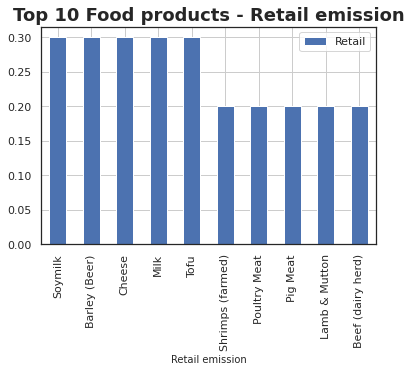

In [83]:
food_prod_sorted = food_prod.sort_values(by = 'Retail', ascending=False).head(10)

food_prod_sorted.plot(x = "Food product", y = "Retail", kind = "bar")

plt.title("Top 10 Food products - Retail emission",fontsize = 18, fontweight = "bold")
plt.xlabel("Retail emission",fontsize = 10)
plt.ylabel("")
plt.grid(True)
plt.show()

Treemap denoting the land use emission of each food product

In [84]:
fig = px.treemap(food_prod, path=['Food product'],
                 values='Land use per kilogram (m² per kilogram)',
                 color='Land use per kilogram (m² per kilogram)' )
fig.update_traces(textinfo="label + value")
fig.show()

Top 10 products by Transport emission

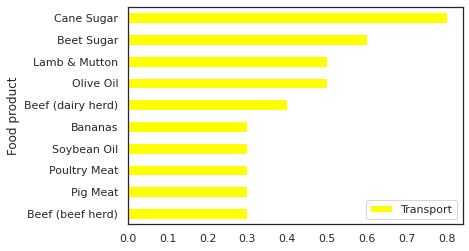

In [85]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

food_prod_sorted = food_prod.sort_values(by = 'Transport').tail(10)

food_prod_sorted.plot(x = "Food product", y = "Transport", kind = "barh", color= "yellow")

Top 10 products contributing to Package emission

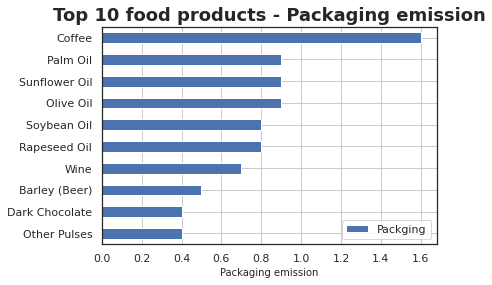

In [86]:
food_prod_sorted = food_prod.sort_values(by = 'Packging').tail(10)

food_prod_sorted.plot(x = "Food product", y = "Packging", kind = "barh")

plt.title("Top 10 food products - Packaging emission",fontsize = 18, fontweight = "bold")
plt.xlabel("Packaging emission",fontsize = 10)
plt.ylabel("")
plt.grid(True)
plt.show()

In [87]:
df_food_fr = df_food[['Food product', 'Total_emissions','Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)','Freshwater withdrawals per 1000kcal (liters per 1000kcal)','Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)','Land use per 1000kcal (m² per 1000kcal)','Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)']]

In [88]:
df_food_fr['sum_emission'] = df_food_fr['Total_emissions'] + df_food_fr['Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)'] + df_food_fr['Freshwater withdrawals per 1000kcal (liters per 1000kcal)'] +df_food_fr['Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)'] + df_food_fr['Land use per 1000kcal (m² per 1000kcal)'] + df_food_fr['Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)']

<ipython-input-88-557b03e74544>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [89]:
test_data = df_food_fr[['Total_emissions', 'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)', 'Freshwater withdrawals per 1000kcal (liters per 1000kcal)', 'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)', 'Land use per 1000kcal (m² per 1000kcal)', 'Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)', 'sum_emission']]

Visualization to view food products and their overall emission

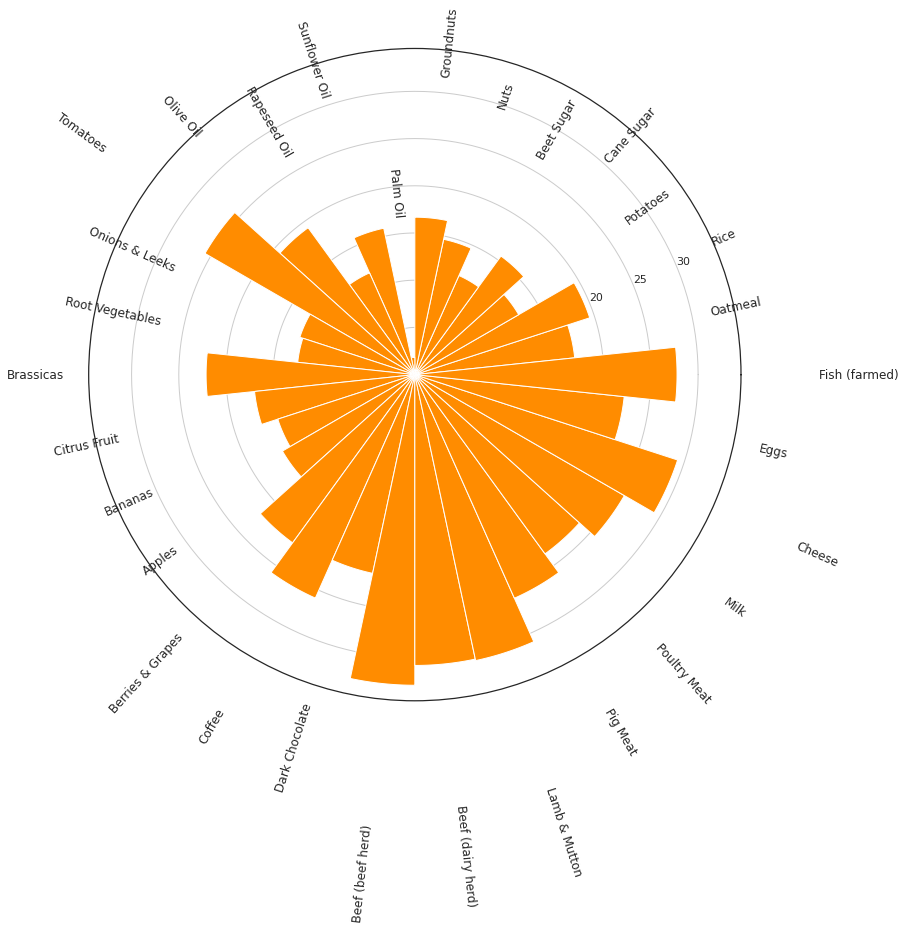

In [90]:
plt.figure(figsize=(12,12))
ax = plt.subplot(111, polar=True)
plt.axis()

#set min and max value
lowerLimit = 0
max_v = df_food_fr['sum_emission'].max()

#set heights and width
heights = df_food_fr['sum_emission']
width = 2*np.pi / len(df_food_fr.index)

#set index and angle
indexes = list(range(1, len(df_food_fr.index)+1))
angles = [element * width for element in indexes]

bars = ax.bar(x=angles, height=heights, width=width, bottom=lowerLimit,
              linewidth=1, edgecolor="white", color="#FF8C00")
labelPadding = 15

for bar, angle, height, label in zip(bars,angles, heights, df_food_fr['Food product']):
    rotation = np.rad2deg(angle)
    alignment = ""
    #deal with alignment
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    ax.text(x=angle, y=lowerLimit + bar.get_height() + labelPadding,
            s=label, ha=alignment, va='center', rotation=rotation, 
            rotation_mode="anchor")
    ax.set_thetagrids([], labels=[])
plt.show()

In [91]:
fp_emission_total = food_prod[['Food product',	'Total_emissions']]

###Fractal clustering - objective function - determining the cluster with the least emission for "total emission" feature, inorder to promote these food products and increase their production 

Calculating: Sum of Square errors within clusters and Silhouette score

In [92]:
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn import metrics

In [93]:
def plot_cluster(df, max_loop=50):
    """
    Looking at the performance of various number of clusters using K-Means.
    Performance is evaluated by within cluster SSE and silhouette score.
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,1:]
    
    # robust scaling is used so that the centering and scaling statistics are therefore not influenced by a few number of very large marginal outliers as they are based on percentiles
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    
    sse_within_cluster = {}
    silhouette_score = {}
    
    for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10)
        #, n_jobs=-1)
        kmeans.fit(X_rb)
        sse_within_cluster[k] = kmeans.inertia_
        silhouette_score[k] = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)

    _ = plt.figure(figsize=(10,6))
    ax1 = plt.subplot(211)
    _ = plt.plot(list(sse_within_cluster.keys()), list(sse_within_cluster.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("SSE Within Cluster")
    _ = plt.title("Within Cluster SSE After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    ax2 = plt.subplot(212)
    _ = plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("Silhouette Score")
    _ = plt.title("Silhouette Score After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)


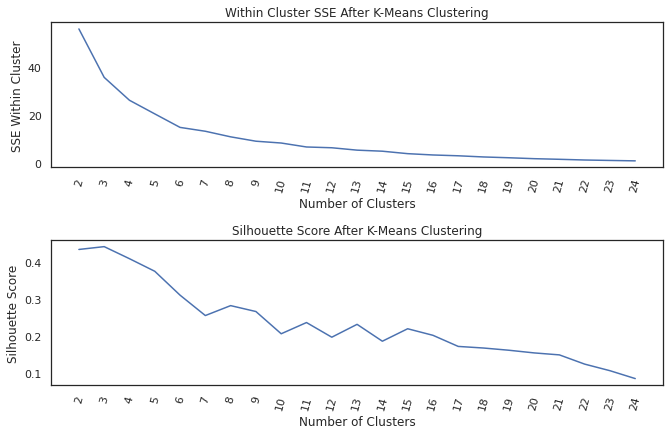

In [94]:
plot_cluster(test_data, max_loop=25)

Evaluating cluster performance

In [95]:
def apply_cluster(df, clusters=2):
    """
    Applying K-Means with the optimal number of clusters identified
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,1:]
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    kmeans = KMeans(n_clusters=clusters, random_state=10, n_init=10) #, n_jobs=-1)  
    kmeans.fit(X_rb) 
    score = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)
    df['cluster'] = kmeans.labels_
    sse_within_cluster = kmeans.inertia_
    
    print("clustering performance")
    print("-----------------------------------")
    print("silhouette score: " + str(score))
    print("sse within cluster: " + str(sse_within_cluster))
    
    return df

In [96]:
cluster_food_prod = apply_cluster(test_data, clusters=3)

clustering performance
-----------------------------------
silhouette score: 0.4430958148162834
sse within cluster: 35.823334422508815


Clustering using Gaussian Mixture Model 

This clustering has been done to determine the various clusters in Freshwater withdrawals and land use - Such as:

- Low freshwater withdrawals, low land use
- Medium freshwater withdrawals, medium land use
- High freshwater withdrawals, high land use

Based on this we can determine how land usage and freshwater withdrawals are related

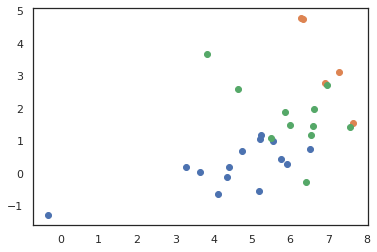

In [97]:
data = test_data

# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(data)

#predictions from gmm
labels = gmm.predict(data)
frame = pd.DataFrame(data)
frame['cluster'] = labels
frame.columns = ['Total_emissions', 'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)', 'Freshwater withdrawals per 1000kcal (liters per 1000kcal)', 'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)', 'Land use per 1000kcal (m² per 1000kcal)', 'Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)', 'sum_emission', 'cluster']


color=['blue','green','cyan', 'black']
for k in range(0,3):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Freshwater withdrawals per 1000kcal (liters per 1000kcal)"], data["Land use per 1000kcal (m² per 1000kcal)"])
plt.show()

In [98]:
test_data.query("cluster == 0").sort_values('Land use per 1000kcal (m² per 1000kcal)')

,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Freshwater withdrawals per 1000kcal (liters per 1000kcal),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Land use per 1000kcal (m² per 1000kcal),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories),sum_emission,cluster
16,2.028148,0.188149,-0.322989,-0.188677,-1.295519,1.409772,1.818885,0
8,0.336472,0.432633,4.127502,-0.662289,-0.651300,7.902726,11.485743,0
7,0.955511,1.572880,5.174265,-0.092465,-0.542666,8.451771,15.519296,0
22,-1.203973,1.470486,4.340641,0.150282,-0.114410,7.828576,12.471603,0
21,-1.203973,2.169826,3.654512,0.301105,0.052644,7.831585,12.805699,0
5,-1.203973,1.559007,4.391206,-0.464554,0.184141,8.232857,12.698684,0
18,1.308333,0.775102,3.291722,-0.852212,0.184393,7.088728,11.796067,0
27,-1.203973,1.105533,5.927481,-0.110001,0.271934,10.202712,16.193686,0
12,0.875469,0.891150,5.766325,-0.585376,0.451515,9.273767,16.672850,0
17,1.252763,1.745850,4.736337,-0.898353,0.692015,8.322196,15.850809,0


K-Means clustering

For the same clusters, performing K-means gives better cluster formations

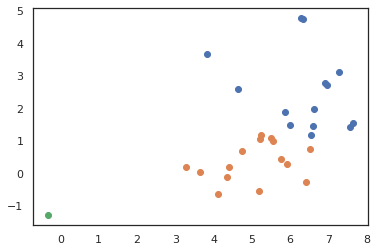

In [99]:
#training k-means model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(test_data)

#predictions from kmeans
pred = kmeans.predict(test_data)
frame = pd.DataFrame(test_data)

frame['cluster'] = pred
frame.columns = ['Total_emissions', 'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)', 'Freshwater withdrawals per 1000kcal (liters per 1000kcal)', 'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)', 'Land use per 1000kcal (m² per 1000kcal)', 'Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)', 'sum_emission', "cluster"]
#
#plotting results
color=['blue','green','cyan', 'black']
for k in range(0,3):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Freshwater withdrawals per 1000kcal (liters per 1000kcal)"], data["Land use per 1000kcal (m² per 1000kcal)"])
    #plt.scatter(data["Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)"], data["Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)"])
plt.show()

Agglomerative Clustering

Performing Agglomerative clustering to form clusters based on Freshwater withdrawals, Land use and Greenhouse gas emissions.

In [100]:
from sklearn.cluster import AgglomerativeClustering

In [101]:
agglo_clustering = AgglomerativeClustering(n_clusters=3)
agglo_clustering.fit(test_data)

AgglomerativeClustering(n_clusters=3)

In [102]:
test_data.head(5)

,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Freshwater withdrawals per 1000kcal (liters per 1000kcal),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Land use per 1000kcal (m² per 1000kcal),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories),sum_emission,cluster
3,0.470004,1.454270,5.214455,-0.056060,1.063830,8.876559,17.023057,1
4,1.386294,2.252804,6.413432,0.188362,-0.274922,9.506726,19.472697,1
5,-1.203973,1.559007,4.391206,-0.464554,0.184141,8.232857,12.698684,1
7,0.955511,1.572880,5.174265,-0.092465,-0.542666,8.451771,15.519296,1
8,0.336472,0.432633,4.127502,-0.662289,-0.651300,7.902726,11.485743,1


In [103]:
import plotly.express as px

fig = px.scatter_3d(test_data, "Freshwater withdrawals per 1000kcal (liters per 1000kcal)", "Land use per 1000kcal (m² per 1000kcal)", "Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)", color="cluster")
fig.show()